In [1]:
## projet présenté porte sur le sujet 2 de scraping du site imb, à cet effet je vous mettez ici le lien github du projet complet, le sujet de scaping de données est le numéro 2.
## https://github.com/amoungui/my_scrapping_project/tree/master
https://github.com/amoungui/my_scrapping_project/tree/master

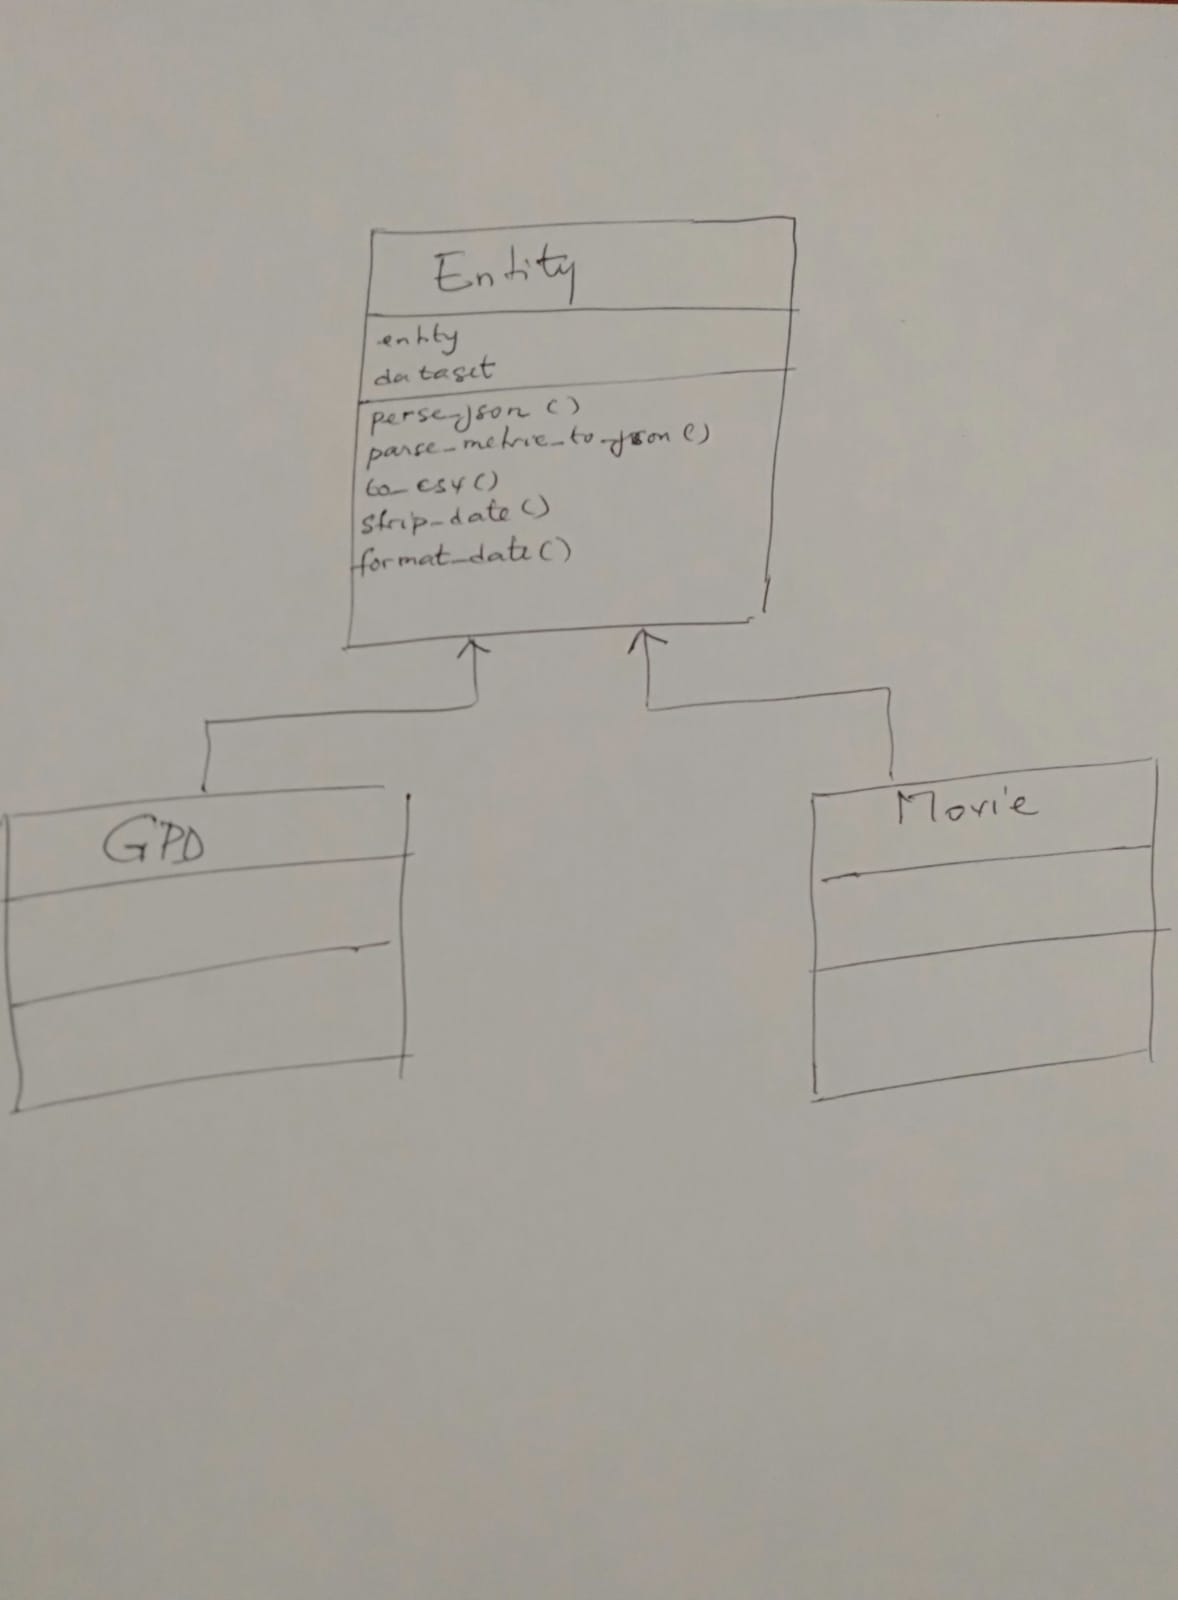

In [4]:
from IPython.display import Image
Image("img/diagrame_de_classes.jpeg", width=50, height=50)

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("data/dataset.csv")

In [44]:
df.head(5) #

,title,rating,score,vote,type,director,writter,duration,release date,release country,...,reviews,storyline,budget en $,Opening weekend USA en $,gross en $,Cumulate Worldwide Gross en $,runtime,sound Mix,Color,Aspect Ratio
0,Hababam Sinifi,9.3,xxx,38228,Comedy; Drama,Ertem Egilmez,Umur Bugay,1h 27min,1975-04-01,Turkey,...,65,"Lazy, uneducated students share a very close b...",xxx,xxx,xxx,xxx,87 min,xxx,xxx,xxx
1,Les Évadés,9.3,80,2395336,Drama,Frank Darabont,Stephen King,2h 22min,1995-03-1,USA,...,9086,Chronicles the experiences of a formerly succe...,25000000.0,72732,28699976,28817291,142 min,Dolby Digital,Color,1.85 : 1
2,Aynabaji,9.2,xxx,23851,Crime; Mystery;,Amitabh Reza Chowdhury,Syed Gaosul Alam Shaon,2h 27min,2016-11-17,Bangladesh,...,173,Ayna is an actor and the prison is his stage. ...,413015.43,xxx,xxx,xxx,147 min,xxx,xxx,xxx
3,Le parrain,9.2,100,1659254,Crime; Drama,Francis Ford Coppola,Mario Puzo,2h 55min,1972-10-18,USA,...,4414,"The Godfather ""Don"" Vito Corleone is the head ...",6000000.0,30239,134966411,246120986,175 min,DTS\r\n(re-release)| Mono,Color\r\n(Technicolor),1.85 : 1
4,Soorarai Pottru,9.1,xxx,79151,Drama,Sudha Kongara,Sudha Kongara,2h 33min,2020-11-11,India,...,1965,"Inspired by the book 'Simply Fly', the film te...",2058671.99,xxx,xxx,xxx,153 min,xxx,xxx,xxx


In [38]:
## 1. Distribution des films par catégorie 

In [22]:
data = df
data = data.set_index('type')
data.groupby('type')['title'].apply(lambda x: x)

type
Comedy; Drama       Hababam Sinifi
Drama                   Les Évadés
Drama              Soorarai Pottru
Crime; Mystery;           Aynabaji
Crime; Drama            Le parrain
Name: title, dtype: object

In [23]:
## 2. Top 50 des budgets des films
data = df
data[['budget en $', 'title']].sort_values('budget en $', ascending=True).head(50)

,budget en $,title
4,2058671.99,Soorarai Pottru
1,25000000.0,Les Évadés
2,413015.43,Aynabaji
3,6000000.0,Le parrain
0,xxx,Hababam Sinifi


In [33]:
## 3. Nombre de films sortie par décennie

In [24]:
def format(x):
    if 'xxx' in x :
        return '2000-01-01'
    if 'xxx' not in x :
        return x
df['release date'] = df['release date'].apply(lambda x: format(x))        



In [25]:
df['release date'] = pd.to_datetime(df['release date'])
data = df.set_index('release date')
data.groupby((data.index.year//10)*10).sum()

,rating,vote,reviews
release date,,,
1970,18.5,1697482,4479
1990,9.3,2395336,9086
2010,9.2,23851,173
2020,9.1,79151,1965


In [59]:
## 4 Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [60]:
## 4.1. Top 20 films ayant générés le plus de revenu.

In [26]:
df[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=True).head(10)

,title,Cumulate Worldwide Gross en $
3,Le parrain,246120986
1,Les Évadés,28817291
0,Hababam Sinifi,xxx
2,Aynabaji,xxx
4,Soorarai Pottru,xxx


In [38]:
## 4.2. Top 20 films ayant générés le moins de revenu.

In [27]:
df[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).tail(5)

,title,Cumulate Worldwide Gross en $
0,Hababam Sinifi,xxx
2,Aynabaji,xxx
4,Soorarai Pottru,xxx
1,Les Évadés,28817291
3,Le parrain,246120986


In [40]:
## 5. Analyse de la popularité des films en fonction de leurs budgets

In [28]:
data = df
data = data.set_index('budget en $')
data.groupby(by='vote', axis=0, sort=True)[['title', 'vote']].apply(lambda x: x).sort_values('vote', ascending=False)

,title,vote
budget en $,,
25000000.0,Les Évadés,2395336
6000000.0,Le parrain,1659254
2058671.99,Soorarai Pottru,79151
xxx,Hababam Sinifi,38228
413015.43,Aynabaji,23851


In [ ]:
## 6. Distribution des revenus générés par genre de film

In [29]:
data = df
data = df.set_index('type')
data.groupby(by='type')[['title', 'gross en $']].apply(lambda x: x).sort_values('gross en $', ascending=True)

,title,gross en $
type,,
Crime; Drama,Le parrain,134966411
Drama,Les Évadés,28699976
Comedy; Drama,Hababam Sinifi,xxx
Drama,Soorarai Pottru,xxx
Crime; Mystery;,Aynabaji,xxx


In [ ]:
## 7. Top 10 des films par retour sur investissement

In [30]:
def convert_(x):
    if x in 'xxx' or 'INR' in x:
        return 1

    else:
        return float(x) # INR56300000            

In [31]:
df['Cumulate Worldwide Gross en $'] = df['Cumulate Worldwide Gross en $'].apply(lambda x: convert_(x))

In [32]:
df['budget en $'] = df['budget en $'].apply(lambda x: convert_(x))

In [33]:
data = df
data['roi'] = data['budget en $']/data['Cumulate Worldwide Gross en $']

In [102]:
data['roi'].sort_values()

92     2.276165e-09
615    8.255853e-09
409    8.490249e-09
412    9.963126e-09
297    1.218001e-08
           ...     
293    9.400000e+06
358    1.000000e+07
411    1.099000e+07
244    3.500000e+07
291    4.000000e+07
Name: roi, Length: 840, dtype: float64

In [45]:
## 8. Note moyenne par année de sortie de film

In [34]:
data = df.set_index('release date')
data.groupby(by=data.index.year, axis=0, sort=True)[['title', 'rating']].sum().sort_values('rating', ascending=False)

,rating
release date,
1975,9.3
1995,9.3
1972,9.2
2016,9.2
2020,9.1


In [71]:
## Mes propositions d'analyse du dataset

In [72]:
## 9. calculer le ration des budgets des films sorties par pays par année

In [35]:
def convert_int(x):
    if x in 'xxx':
        return 0
    else:
        return float(x) # .replace('.', '')

In [36]:
df.pivot_table(values='budget en $', index='release date', columns='release country')

release country,Bangladesh,India,Turkey,USA
release date,,,,
1972-10-18,NaN,NaN,NaN,6000000.0
1975-04-01,NaN,NaN,1.0,NaN
1995-03-01,NaN,NaN,NaN,25000000.0
2016-11-17,413015.43,NaN,NaN,NaN
2020-11-11,NaN,2058671.99,NaN,NaN


In [ ]:
## 10. Determiner le score et types de film produit par auteur(writter) 

In [37]:
data = df.reset_index()
data['score'] = data['score'].apply(lambda x: convert_int(x))
data_pivot = data.pivot_table(values='score', index='writter', columns='type')
data_pivot

type,Comedy; Drama,Crime; Drama,Crime; Mystery;,Drama
writter,,,,
Mario Puzo,NaN,100.0,NaN,NaN
Stephen King,NaN,NaN,NaN,80.0
Sudha Kongara,NaN,NaN,NaN,0.0
Syed Gaosul Alam Shaon,NaN,NaN,0.0,NaN
Umur Bugay,0.0,NaN,NaN,NaN


In [38]:
## 11. determination du nombre de vote total que chaque compositeur (Writter) a pu avoir dans toute sa carrière de cinéaste
data_pivot.sum(axis=1)

writter
Mario Puzo                100.0
Stephen King               80.0
Sudha Kongara               0.0
Syed Gaosul Alam Shaon      0.0
Umur Bugay                  0.0
dtype: float64

In [ ]:
## représentation du budget de réalisation en fonction du retour sur investissement

C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget en $', ylabel='Cumulate Worldwide Gross en $'>

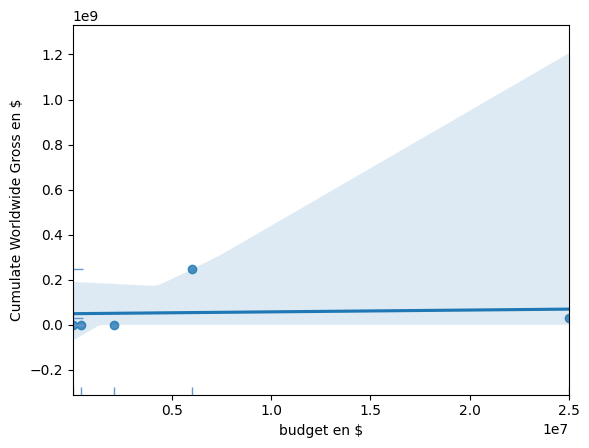

In [41]:
fig, ax = plt.subplots()
sns.regplot(x="budget en $", y="Cumulate Worldwide Gross en $", data=df, ax=ax, lowess=False)  
# adding the small lines to indicate individual data points
sns.rugplot(df["budget en $"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(df["Cumulate Worldwide Gross en $"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)